## Stable Matching problem with constant number of ranking variant
There are k many possible rankings of hospitals, and also k possible rankings of students. In
this case, the input is given as n; k;H; S;HI; SI, where H and S are now *kxn* matrices, and arrays
HI and SI specify, for each hospital and student, which row of matrices H and S each hospital
(respectively, student) uses as ranking.

In [41]:
import numpy as np
import pandas as pd
import random
import time


def stable_match(k,n,H,S,Hi,Si):
    #All hospitals are unmatched at first
    unmatchedH = list(range(n))
    #No hospital selected any student, 
    #neither the student selected any hospitals, 
    #so an array of None
    hospital = [None]*n
    student = [None] *n
    #pointer to next proposal, it helps to keep track of the students
    #that a hospital will propose next
    #at the beginning,hospital's next proposal
    #would be to the 0th (first) preference in his ranking
    nextStudentPointers = [0]*n
    iteration = 0
    while unmatchedH:
        h = unmatchedH[0] #selecting an unmatched hospital
        hranking = H[Hi[h]] #assigning its ranking list from input
        s = hranking[nextStudentPointers[h]] #getting the student that is next on h's ranking
        sranking = S[Si[s]] #storing student S's ranking
        # Find if any match already exists, might be None
        sCurrentMatch = student[s]
        iteration = iteration +1
        #Hospital proposes to the student
        if sCurrentMatch==None:
            # No current match case
            # store the match
            student[s] = h
            hospital[h]= s
            # increase student pointer
            nextStudentPointers[h] = nextStudentPointers[h]+1
            # remove the Hospital from the unmatched list
            unmatchedH.pop(0)
        else:
            # a match already exists
            #check the index in the pref list for the student
            #if the student likes this hospital more than the
            #present match
            currentMatchIndex = sranking.index(sCurrentMatch)
            hIndex= sranking.index(h)
            # s accepts the proposal if the currentMatch index 
            # is bigger than hIndex (as h is more preferable then)
            if  hIndex<currentMatchIndex:
                #s accepts h
                student[s] = h
                hospital[h] = s
                nextStudentPointers[h] = nextStudentPointers[h]+1
                unmatchedH.pop(0)
                # add the current match to the unmatched list
                unmatchedH.insert(0,sCurrentMatch)
                
            else:
                #s rejects h
                nextStudentPointers[h] = nextStudentPointers[h]+1
    #print("{} rounds used".format(iteration))
    return (hospital,iteration)
                         
    



In [28]:
#Generating random data for testing the implementation

k=1000
n=800
#initializing H randomly
H = [[0]*n]*k  # [[value]*rows]*columns
for i in range(k):
    H[i] = random.sample(range(n), n)

#initializing S randomly
S = [[0]*n]*k  # [[value]*rows]*columns
for i in range(k):
    S[i] = random.sample(range(n),n)

#initializing Hi & Si randomly, to determine a row of H & S 2D array to be the pref list
Hi= random.choices(range(k),k=n) #second parameter k is the param name of random.choices()
Si= random.choices(range(k),k=n)


h,round = stable_match(k,n,H,S,Hi,Si)
print("Hospital    Student")
for hospital, student in enumerate(h):
    print("    "+str(hospital)+"        "+str(student))
print(str(round) + " Rounds occured")
    

Hospital    Student
    0        478
    1        159
    2        51
    3        34
    4        592
    5        367
    6        68
    7        245
    8        152
    9        326
    10        116
    11        697
    12        415
    13        537
    14        161
    15        564
    16        531
    17        433
    18        303
    19        707
    20        554
    21        178
    22        662
    23        100
    24        487
    25        377
    26        427
    27        220
    28        448
    29        717
    30        440
    31        168
    32        248
    33        185
    34        458
    35        451
    36        783
    37        413
    38        791
    39        655
    40        615
    41        138
    42        467
    43        651
    44        529
    45        232
    46        126
    47        307
    48        666
    49        524
    50        206
    51        775
    52        264
    53        31
    54        8
    55

In [48]:
#C(i)
# k=n, n will be random from n=20 to n=200
kvalues = list(range(20,210,10))
performanceDataframe = pd.DataFrame(columns=["n","Average Rounds","Average Running time"])
#performanceDataframe 
# iterating over different k values
for k in kvalues:
    k= k
    n= k
    totalRunningTime = 0.0
    totalRounds = 0
    for i in range(10):
        #initializing H randomly
        H = [[0]*n]*k  # [[value]*rows]*columns
        for i in range(k):
            H[i] = random.sample(range(n), n)

        #initializing S randomly
        S = [[0]*n]*k  # [[value]*rows]*columns
        for i in range(k):
            S[i] = random.sample(range(n),n)

        #initializing Hi & Si randomly, to determine a row of H & S 2D array to be the pref list
        Hi= random.choices(range(k),k=n) #second parameter k is the param name of random.choices()
        Si= random.choices(range(k),k=n)
        startTime = time.time()
        h,round = stable_match(k,n,H,S,Hi,Si)
        runningTime =  time.time() - startTime
        totalRounds +=round
        totalRunningTime +=runningTime
    averageRounds = totalRounds / 10
    averageRunningTime = totalRunningTime /10 
    performanceDataframe = performanceDataframe.append({"n":n,"Average Rounds":averageRounds,"Average Running time":averageRunningTime},ignore_index=True)
    #print(str(runningTime) +"seconds Time Needed ")
    
    

In [49]:
performanceDataframe

,n,Average Rounds,Average Running time
0,20.0,72.0,0.000000
1,30.0,122.4,0.000200
2,40.0,176.2,0.000200
3,50.0,262.4,0.000300
4,60.0,331.2,0.000699
5,70.0,356.2,0.000500
6,80.0,464.6,0.001000
7,90.0,678.8,0.001100
8,100.0,653.8,0.001000
9,110.0,829.5,0.001400


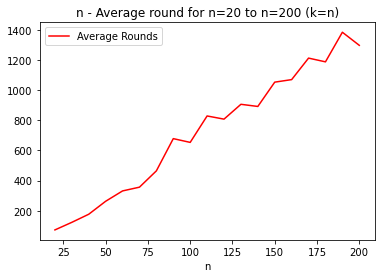

In [88]:
import matplotlib.pyplot as plt

nvsRoundplot = performanceDataframe.plot(
    x="n",
    y="Average Rounds",
    kind = "line",
    title="n - Average round for n=20 to n=200 (k=n)",
    color="red"
)
fig = plt.gcf()
fig.savefig("nvsRoundplot1.png")


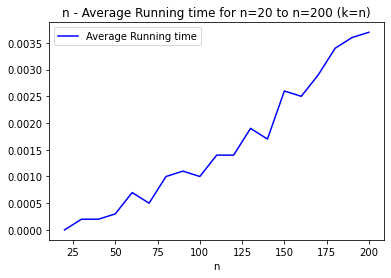

In [89]:
nvsRunningTimePlot = performanceDataframe.plot(
    x="n",
    y="Average Running time",
    kind = "line",
    title="n - Average Running time for n=20 to n=200 (k=n)",
    color="blue"
)

fig = plt.gcf()
fig.savefig("nvsRT1.png")

In [63]:
#C(ii)
# k=10, n will be random from n=20 to n=200
nvalues = list(range(20,210,10))
performanceDataframe2 = pd.DataFrame(columns=["n","Average Rounds","Average Running time"])
#performanceDataframe 
# iterating over different k values
for n in nvalues:
    k= 10
    n= n
    totalRunningTime = 0.0
    totalRounds = 0
    for i in range(10):
        #initializing H randomly
        H = [[0]*n]*k  # [[value]*rows]*columns
        for i in range(k):
            H[i] = random.sample(range(n), n)

        #initializing S randomly
        S = [[0]*n]*k  # [[value]*rows]*columns
        for i in range(k):
            S[i] = random.sample(range(n),n)

        #initializing Hi & Si randomly, to determine a row of H & S 2D array to be the pref list
        Hi= random.choices(range(k),k=n) #second parameter k is the param name of random.choices()
        Si= random.choices(range(k),k=n)
        startTime = time.time()
        h,round = stable_match(k,n,H,S,Hi,Si)
        runningTime =  time.time() - startTime
        totalRounds +=round
        totalRunningTime +=runningTime
    averageRounds = totalRounds / 10
    averageRunningTime = totalRunningTime /10 
    performanceDataframe2 = performanceDataframe2.append({"n":n,"Average Rounds":averageRounds,"Average Running time":averageRunningTime},ignore_index=True)
    #print(str(runningTime) +"seconds Time Needed ")

In [64]:
performanceDataframe2

,n,Average Rounds,Average Running time
0,20.0,82.6,0.000100
1,30.0,182.9,0.000200
2,40.0,296.9,0.000400
3,50.0,445.2,0.000700
4,60.0,592.6,0.000800
5,70.0,780.1,0.001262
6,80.0,944.4,0.001900
7,90.0,1245.8,0.002500
8,100.0,1427.8,0.002700
9,110.0,1672.7,0.003501


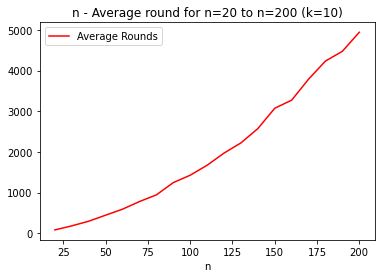

In [91]:
nvsRoundplot2 = performanceDataframe2.plot(
    x="n",
    y="Average Rounds",
    kind = "line",
    title="n - Average round for n=20 to n=200 (k=10)",
    color="red"
)
fig = plt.gcf()
fig.savefig("nvsRoundplot2.png")

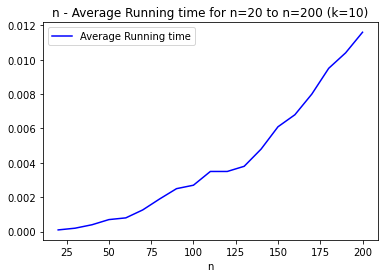

In [93]:
nvsRunningTimePlot2 = performanceDataframe2.plot(
    x="n",
    y="Average Running time",
    kind = "line",
    title="n - Average Running time for n=20 to n=200 (k=10)",
    color="blue"
)
fig = plt.gcf()
fig.savefig("nvsRTplot2.png")

In [78]:
#C(iii)
# k= random values <n, n will be sequential from n=20 to n=200
nvalues = list(range(20,210,10))
performanceDataframe3 = pd.DataFrame(columns=["n","k","Length of input (words)"])
#performanceDataframe 
# iterating over different k values
for n in nvalues:
    k= random.randint(5,n)
    n= n
    totalRunningTime = 0.0
    totalRounds = 0
    
    H = [[0]*n]*k  # [[value]*rows]*columns
    for i in range(k):
        H[i] = random.sample(range(n), n)

    #initializing S randomly
    S = [[0]*n]*k  # [[value]*rows]*columns
    for i in range(k):
        S[i] = random.sample(range(n),n)

    #initializing Hi & Si randomly, to determine a row of H & S 2D array to be the pref list
    Hi= random.choices(range(k),k=n) #second parameter k is the param name of random.choices()
    Si= random.choices(range(k),k=n)
    startTime = time.time()
    h,round = stable_match(k,n,H,S,Hi,Si)
    #Considering length of input as 2nk+2n words
    performanceDataframe3 = performanceDataframe3.append({"n":n,"k":k,"Length of input (words)":(2*n*k+2*n)},ignore_index=True)
    #print(str(runningTime) +"seconds Time Needed ")

In [79]:
performanceDataframe3

,n,k,Length of input (words)
0,20,8,360
1,30,25,1560
2,40,25,2080
3,50,24,2500
4,60,8,1080
5,70,47,6720
6,80,51,8320
7,90,5,1080
8,100,74,15000
9,110,11,2640


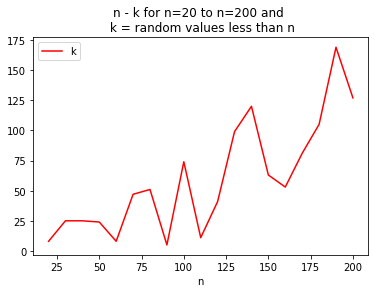

In [96]:
nvskplot3 = performanceDataframe3.plot(
    x="n",
    y="k",
    kind = "line",
    title="n - k for n=20 to n=200 and \n k = random values less than n",
    color="red"
)

fig = plt.gcf()
fig.savefig("nvskplot3.png")

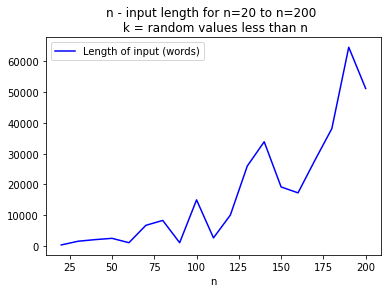

In [95]:
nvsinputLengthplot3 = performanceDataframe3.plot(
    x="n",
    y="Length of input (words)",
    kind = "line",
    title="n - input length for n=20 to n=200 \n k = random values less than n",
    color="blue"
)
fig = plt.gcf()
fig.savefig("nvsinputlength3.png")